In [15]:
# !pip install scikit-learn plotly nbformat umap-learn

In [1]:
from transformers import AutoTokenizer, DistilBertModel
import torch
import pandas
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

/Users/mattelim/miniforge3/envs/6861/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
color_words = [
    'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blue', 'brown',
    'chartreuse', 'chocolate', 'coral', 'crimson', 'cyan', 'firebrick', 'fuchsia',
    'gold', 'gray', 'green', 'indigo', 'ivory', 'khaki', 'lavender', 'lime', 'magenta',
    'maroon', 'navy', 'olive', 'orange', 'orchid', 'pink', 'plum', 'purple', 'red',
    'salmon', 'sienna', 'silver', 'tan', 'teal', 'tomato', 'turquoise', 'violet',
    'wheat', 'white', 'yellow'
]

print(len(color_words))

44


In [3]:
# forced_sentence = f"The color is {color_words[-4]}."
# # forced_sentence = f"The artists used {color_words[-4]} paint because they like the color."
# inputs = tokenizer(forced_sentence, return_tensors="pt") 
# outputs = model(**inputs)
# # last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
# last_hidden_states = outputs.last_hidden_state

In [4]:
# print(inputs)
# print(outputs)
# print(last_hidden_states.shape)

In [5]:
# print("Length of inputs string: ", inputs['input_ids'].shape)

# # print index, token, and matching token id
# for i in range(len(inputs['input_ids'][0])):
#     print(f'{i}: {inputs["input_ids"][0][i]}: {tokenizer.decode([inputs["input_ids"][0][i]])}')

In [6]:
# extract the contextual word embedding for the color word, beginning at the 5th token and ending before the input id 6773
# color_word_emb = []
# idx = 4

# while inputs['input_ids'][0][idx] != 1012:
#     print(idx)
#     color_word_emb.append(last_hidden_states[0][idx])
#     idx += 1

# mean_color_word_emb = torch.mean(torch.stack(color_word_emb), dim=0)
# print(mean_color_word_emb.shape)

In [7]:
# sanity check
# print(mean_color_word_emb - last_hidden_states[0][4])
# print(torch.sum(abs(mean_color_word_emb - last_hidden_states[0][4])))

In [8]:
color_embeddings = []

for color_word in color_words:
    forced_sentences = []
    forced_sentences.append(f"The color is {color_word}.")
    forced_sentences.append(f"The artists used {color_word} paint because they like the color.")
    forced_sentences.append(f"The {color_word} colored hats are on sale.")

    color_word_start = [4, 4, 2]
    color_word_next = [".", "paint", "colored"]
    
    mean_color_word_embs = []
    
    for i, forced_sentence in enumerate(forced_sentences):
        inputs = tokenizer(forced_sentence, return_tensors="pt") 
        outputs = model(**inputs)
        # last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
        last_hidden_states = outputs.last_hidden_state

        color_word_emb = []
        idx = color_word_start[i]
        end_token = tokenizer.encode(color_word_next[i])[1]
        # print(end_token)
        # this is a hacky way to get the word embedding for the color word
        while inputs['input_ids'][0][idx] != end_token:
            # print(inputs['input_ids'][0][idx])
            # print(idx, tokenizer.decode([inputs["input_ids"][0][idx]]))
            color_word_emb.append(last_hidden_states[0][idx])
            idx += 1

        mean_color_word_embs.append(torch.mean(torch.stack(color_word_emb), dim=0))
        
        # print([color_word_pos[i]])
        # print(tokenizer.decode([inputs["input_ids"][0][color_word_pos[i]]]))
        # print(color_word)
        
        # try:
        #     assert color_word == tokenizer.decode([inputs["input_ids"][0][color_word_pos[i]]])
        # except:
        #     print(tokenizer.decode([inputs["input_ids"][0][color_word_pos[i]]]))
        #     print(color_word)

        # print(mean_color_word_emb.shape)
    
    color_embeddings.append(torch.mean(torch.stack(mean_color_word_embs), dim=0).detach().numpy())

print(len(color_embeddings))

44


In [9]:
# create a dataframe with the color embeddings
df = pandas.DataFrame(color_embeddings)

# prepend the color words to the dataframe
# df.insert(0, "color", color_words)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.253123,-0.249771,0.043617,-0.096057,0.342065,0.114904,-0.003339,0.475602,-0.538465,-0.211194,...,-0.188152,-0.483659,0.234674,0.059127,0.254930,0.033057,0.221213,-0.064148,0.194854,0.503360
1,0.247966,-0.365421,0.180272,-0.034708,0.631888,-0.134578,-0.092159,0.621188,-0.299055,-0.258946,...,-0.115882,-0.464740,0.258937,0.004898,0.169303,-0.239724,0.045012,-0.103517,0.358925,0.287821
2,-0.126218,-0.255545,-0.070515,-0.095322,0.563521,-0.095231,-0.074181,0.480402,-0.004840,-0.509398,...,-0.055500,-0.202443,0.337887,-0.242753,0.137523,-0.227353,0.009727,-0.270822,0.312618,0.016873
3,-0.414101,-0.232440,0.294683,-0.308620,0.617685,0.129191,-0.095368,0.228096,-0.286819,-0.171484,...,-0.202698,-0.231477,-0.043929,-0.380397,0.435634,-0.259277,-0.156512,0.066853,0.290601,0.137937
4,0.031607,-0.184349,0.191696,0.260324,0.831084,-0.227194,-0.256996,0.907478,-0.174876,-0.194191,...,-0.059741,-0.231553,0.073647,-0.127098,0.132783,-0.233788,-0.300824,-0.111516,0.256149,0.247422


In [10]:
# find the standard deviation of each column
std_dev = df.std(axis=0)
print(std_dev)

0      0.237941
1      0.183988
2      0.188444
3      0.135107
4      0.199674
         ...   
763    0.168060
764    0.169889
765    0.110045
766    0.114827
767    0.228210
Length: 768, dtype: float32


In [11]:
# find the top 5 colors with the lowest standard deviation
bottom_colors = std_dev.nsmallest(10)
print(bottom_colors)

124    0.081632
295    0.081689
720    0.082012
207    0.083844
529    0.084531
588    0.087500
381    0.088018
541    0.088996
145    0.089971
10     0.090805
dtype: float32


In [12]:
# find the top 5 colors with the highest standard deviation
top_colors = std_dev.nlargest(10)
print(top_colors)

470    0.439692
251    0.391019
101    0.347285
750    0.340861
18     0.333707
700    0.327355
601    0.323968
46     0.322127
333    0.316906
135    0.306105
dtype: float32


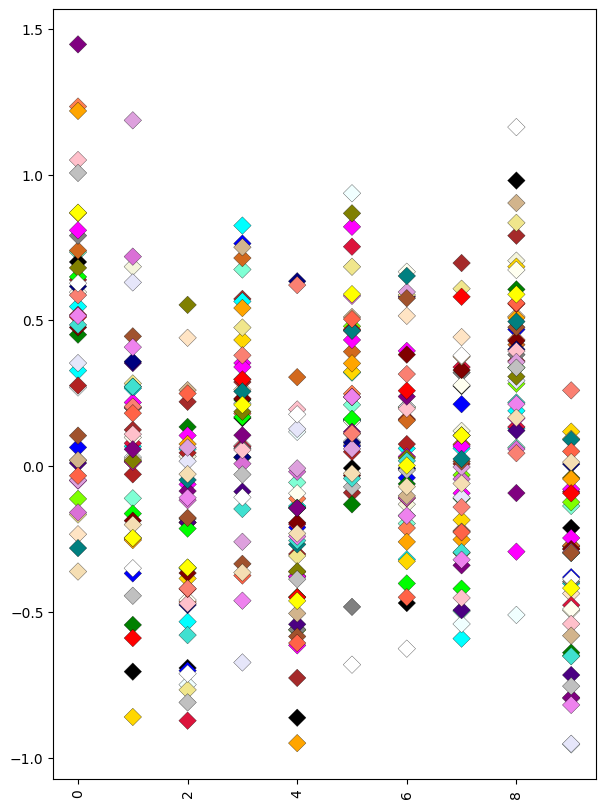

In [45]:
# selected_idx = top_colors.index[0]

# create new df with only selected column
# paired_df = df[[selected_idx]]
# # paired_df = df.iloc[:,selected_idx]
# paired_df.insert(0, "color", color_words)
# print(paired_df)

# plot paired_df as points on a graph
# show the color word beside each point
# plt.scatter(paired_df['color'], paired_df[selected_idx], color=color_words, edgecolors='black', linewidths=0.2)
# plt.scatter([0 for i in range(len(paired_df[selected_idx]))], paired_df[selected_idx], color=color_words)
# plt.xticks(rotation=90)
# plt.show()

for j, selected_idx in enumerate(top_colors.index):
  paired_df = df[[selected_idx]]
  paired_df.insert(0, "color", color_words)
  # plt.scatter(paired_df['color'], paired_df[selected_idx], color=color_words, edgecolors='black', linewidths=0.2)
  plt.scatter([j for i in range(len(paired_df[selected_idx]))], paired_df[selected_idx], color=color_words, edgecolors='black', linewidths=0.2, marker='D', s=80)

# stretch out the y-axis
# plt.ylim(-1, 1)

# set chart height
plt.rcParams["figure.figsize"] = (7,10)
plt.xticks(rotation=90)
plt.show()

# # set background color
# plt.rcParams['axes.facecolor'] = 'white'
# # # set background color
# ax = plt.gca()
# # ax.set_facecolor('xkcd:light grey')

0    -0.261147
1     0.331750
2    -1.358286
3     0.737276
4     1.220652
5    -0.832116
6    -0.125638
7     2.109468
8    -0.170700
9     2.081439
10    0.997107
11    0.228173
12    1.405975
13    0.683161
14    0.425831
15    0.304018
16    0.122171
17   -0.519821
18   -0.809942
19    1.719225
20    2.322467
21   -0.026382
22   -0.677376
23    1.506438
24    0.781345
25    1.746311
26    1.940009
27    0.935217
28    0.122222
29    0.998125
30    1.647855
31    0.508186
32    1.117386
33    1.960948
34    0.457830
35   -1.395294
36    1.384126
37    1.657323
38   -0.150000
39   -0.980726
40   -0.751148
41   -1.163883
42   -0.518586
43    0.888306
dtype: float32


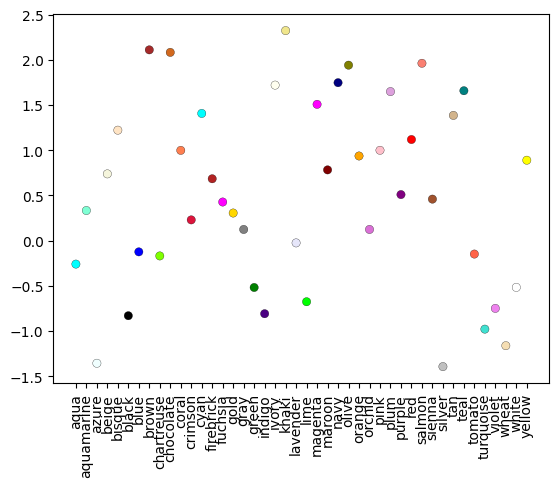

In [8]:
# create new df with top 10 colors with highest std dev
top_df = df[top_colors.index]
# top_df.insert(0, "color", color_words
# print(top_df)

# sum the columns of the top 10 colors
sum_top_df = top_df.sum(axis=1)
print(sum_top_df)

# plot sum_top_df as points on a graph
plt.scatter(color_words, sum_top_df, color=color_words, edgecolors='black', linewidths=0.2)
# plt.scatter([0 for i in range(len(sum_top_df))], sum_top_df, color=color_words)
plt.xticks(rotation=90)
plt.show()

In [13]:
import plotly.express as px
from sklearn.decomposition import PCA

In [36]:
# perform PCA
pca = PCA(n_components=3)
components = pca.fit_transform(df)

In [37]:
# turn components into a dataframe
components_df = pandas.DataFrame(components)
components_df.columns = components_df.columns.astype(str)
components_df.insert(0, "color", color_words)
components_df.head()

,color,0,1,2
0,aqua,-0.001784,-1.563260,2.587935
1,aquamarine,0.726297,-0.511366,3.451691
2,azure,-0.654262,-0.941124,3.081299
3,beige,-0.831060,-0.359083,-1.277058
4,bisque,2.546004,0.608041,-0.653226


In [38]:
fig = px.scatter_3d(
    components_df, x='0', y='1', z='2', color='color',
    hover_data={'color': True, '0': False, '1': False, '2': False},
    color_discrete_sequence=color_words
)
fig.show()

In [14]:
# Do UMAP on the color embeddings
import umap
import numpy as np

In [53]:
# create a numpy array from the color embeddings
color_embeddings_np = np.array(color_embeddings)
print(color_embeddings_np.shape)

(44, 768)


In [76]:
# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=3,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(color_embeddings_np)
embedding.shape

(44, 3)

In [80]:
# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

,color,0,1,2
0,aqua,3.610571,6.389138,1.266190
1,aquamarine,3.786220,6.185012,1.061385
2,azure,8.143478,1.871086,2.060515
3,beige,0.092611,4.147947,9.663830
4,bisque,9.015975,14.591465,0.019003


In [81]:
fig = px.scatter_3d(
    embedding_df, x='0', y='1', z='2', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [94]:
# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(color_embeddings_np)
embedding.shape

(44, 2)

In [95]:
# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

,color,0,1
0,aqua,3.225865,-4.782084
1,aquamarine,2.960765,-5.063809
2,azure,12.807049,10.058036
3,beige,-0.618042,-2.274444
4,bisque,4.204097,15.236819


In [96]:
fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

Use the 10 axes with highest variance

In [28]:
# print(top_df)

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(top_df)
embedding.shape

(44, 2)

In [29]:
# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

,color,0,1
0,aqua,-4.549314,6.627836
1,aquamarine,-4.400955,6.479497
2,azure,0.530533,1.981613
3,beige,5.371177,19.360598
4,bisque,2.293732,-5.364300


In [30]:
fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

The reduced set does not show the structure that is observed in the original set.

In [23]:
top_30_df = df[std_dev.nlargest(30).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(top_30_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [16]:
top_50_df = df[std_dev.nlargest(50).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(top_50_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [26]:
top_100_df = df[std_dev.nlargest(100).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(top_100_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [30]:
top_200_df = df[std_dev.nlargest(200).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(top_200_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [38]:
top_300_df = df[std_dev.nlargest(300).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(top_300_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

At 300 highest-varying axes, the UMAP is showing structure that resmembles the full set.

In [40]:
top_300sm_df = df[std_dev.nsmallest(300).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(top_300sm_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [50]:
# select the first 300 columns of df
first_300_df = df.iloc[:,0:300]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(first_300_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

Out of the tests with 300 columns, the one with the highest variance seems to resemble the full set the most.

In [46]:
top_100sm_df = df[std_dev.nsmallest(100).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(top_100sm_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

This seems like quite a surprising result. The smallest 100 captures a lot of color structure?

This implies that:
- color information is embedding within other semantic axes
- smaller variance does not mean less information

What's a little perplexing is how the smallest and largest variance datasets seem to be much better than just selecting the first x dataset. Perhaps it is because in the first x dataset, smaller values become noise?

In [47]:
top_50sm_df = df[std_dev.nsmallest(50).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(top_50sm_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [39]:
top_400_df = df[std_dev.nlargest(400).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(top_400_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [54]:
no_cont_emb = []
for i in range(len(color_words)):
# for i in range(1):
    input_ids = torch.tensor(tokenizer.encode(color_words[i])).unsqueeze(0)
    outputs = model(input_ids)
    last_hidden_states = outputs[0]
    # skip the first and last token, which is the [CLS] and [SEP] tokens
    # take the mean of other tokens (that form the word)    
    no_cont_emb.append(torch.mean(last_hidden_states[0][1:-1], dim=0).tolist())

print(len(no_cont_emb))
print(len(no_cont_emb[0]))


44
768


In [55]:
# create a dataframe with the color embeddings
no_cont_df = pandas.DataFrame(no_cont_emb)

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(no_cont_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [57]:
# find the standard deviation of each column
no_cont_std_dev = no_cont_df.std(axis=0)

In [61]:
# create a dataframe with the color embeddings
no_cont_300_lg_df = no_cont_df[no_cont_std_dev.nlargest(300).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(no_cont_300_lg_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [62]:
# create a dataframe with the color embeddings
no_cont_300_sm_df = no_cont_df[no_cont_std_dev.nsmallest(300).index]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(no_cont_300_sm_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()

In [63]:
# create a dataframe with the color embeddings
no_cont_300_first_df = no_cont_df.iloc[:,0:300]

# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(no_cont_300_first_df)
embedding.shape

# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)
embedding_df.head()

fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()